In [ ]:
# Generación del requirements.txt
!pip freeze > ../requirements.txt

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import dotenv
dotenv.load_dotenv()
import sys
sys.path.append("../")
import src.soporte_variables as sv
import matplotlib.pyplot as plt
import seaborn as sns

# 2. EDA y visualización

In [2]:
df_actividades_bcn = pd.read_csv("../datos/actividades_bcn_2024-10-20.csv", index_col=0)
df_actividades_lon = pd.read_csv("../datos/actividades_lon_2024-10-20.csv", index_col=0)
df_hoteles_bcn = pd.read_csv("../datos/hoteles_bcn_2024-10-20.csv", index_col=0)
df_hoteles_lon = pd.read_csv("../datos/hoteles_lon_2024-10-20.csv", index_col=0)
df_vuelos_bcn = pd.read_csv("../datos/vuelos_bcn_2024-10-20.csv", index_col=0)
df_vuelos_lon = pd.read_csv("../datos/vuelos_lon_2024-10-20.csv", index_col=0)

In [3]:
df_hoteles_bcn.drop(columns=["estrellas"], inplace=True)
df_hoteles_lon.drop(columns=["estrellas"], inplace=True)
df_actividades_bcn['precio'] = df_actividades_bcn['precio'].replace(['[€]', 'Pago libre'], ['', '0'], regex=True).str.replace(',', '.').astype(float)
df_actividades_bcn['puntuacion'] = pd.to_numeric(df_actividades_bcn['puntuacion'], errors='coerce')
df_actividades_lon['precio'] = df_actividades_lon['precio'].replace(['[€]', 'Pago libre'], ['', '0'], regex=True).str.replace(',', '.').astype(float)
df_actividades_lon['puntuacion'] = pd.to_numeric(df_actividades_lon['puntuacion'], errors='coerce')
df_vuelos_bcn['precio'] = df_vuelos_bcn['precio'].replace('[€]', '', regex=True).str.replace(',', '.').astype(float)
df_vuelos_lon['precio'] = df_vuelos_lon['precio'].replace('[€]', '', regex=True).str.replace(',', '.').astype(float)

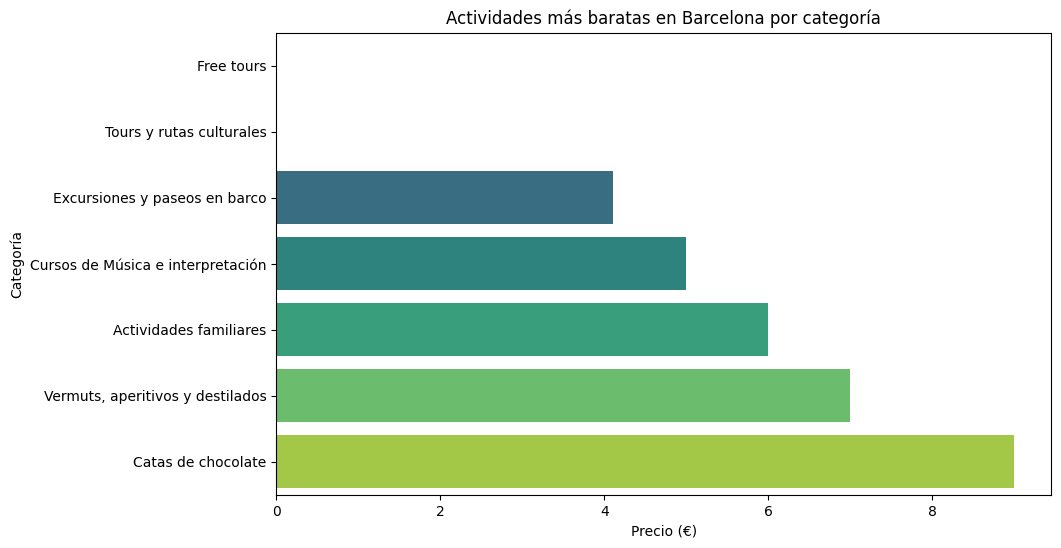

In [5]:
df_baratas_bcn = df_actividades_bcn.nsmallest(10, 'precio')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_baratas_bcn, x='precio', y='categoria', palette="viridis")
plt.title('Actividades más baratas en Barcelona por categoría')
plt.xlabel('Precio (€)')
plt.ylabel('Categoría')
plt.show()

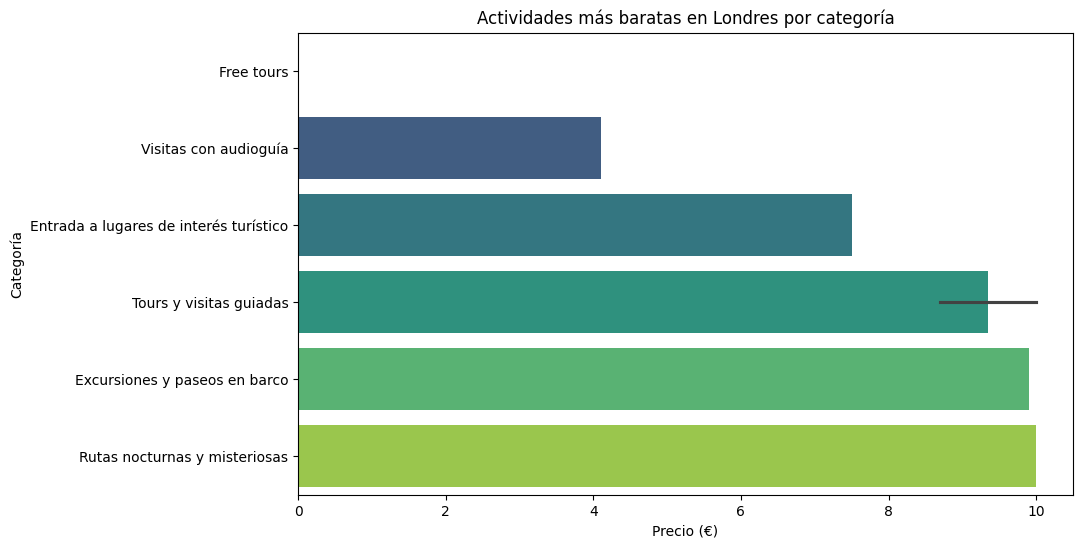

In [7]:
df_baratas_lon = df_actividades_lon.nsmallest(10, 'precio')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_baratas_lon, x='precio', y='categoria', palette="viridis")
plt.title('Actividades más baratas en Londres por categoría')
plt.xlabel('Precio (€)')
plt.ylabel('Categoría')
plt.show()

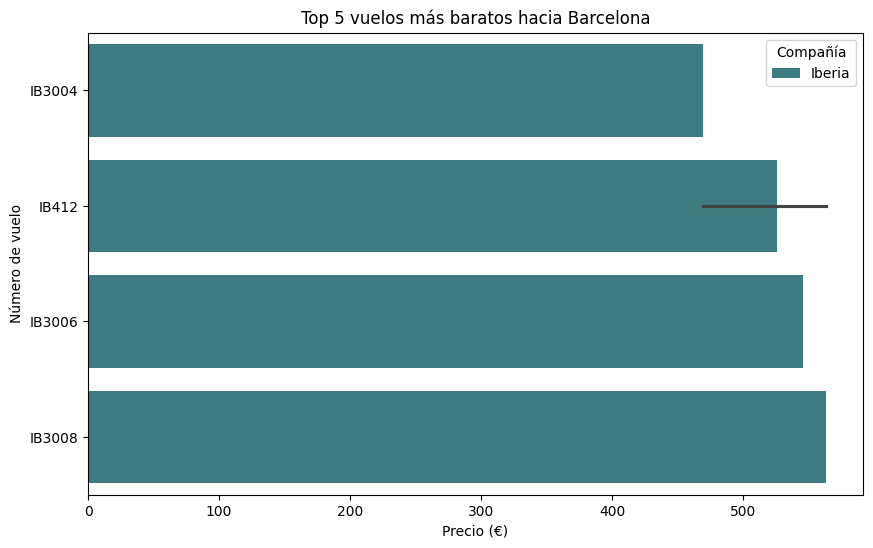

In [29]:
vuelos_mas_baratos_bcn = df_vuelos_bcn.nsmallest(6, 'precio')

plt.figure(figsize=(10, 6))
sns.barplot(data=vuelos_mas_baratos_bcn, x='precio', y='número de vuelo', hue='compañía', palette="crest")
plt.title('Top 5 vuelos más baratos hacia Barcelona')
plt.xlabel('Precio (€)')
plt.ylabel('Número de vuelo')
plt.legend(title='Compañía')
plt.show()

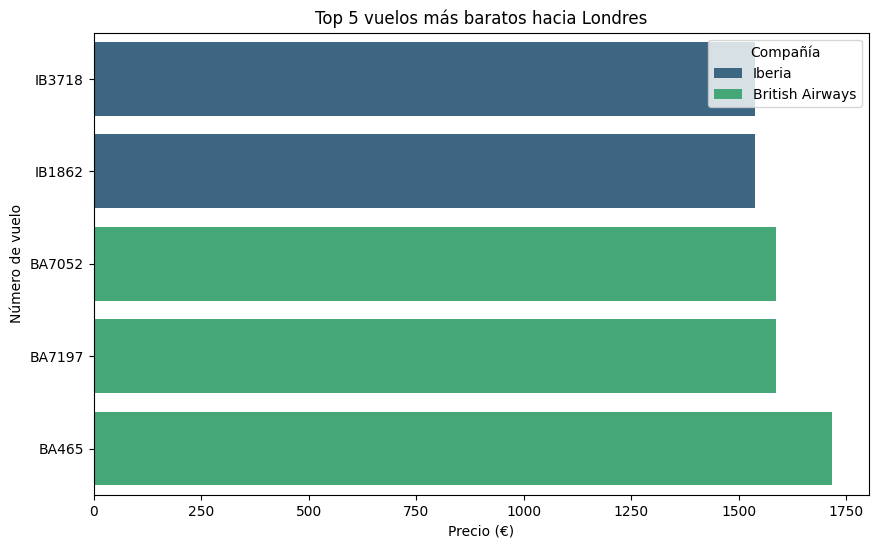

In [21]:
vuelos_mas_baratos_lon = df_vuelos_lon.nsmallest(5, 'precio')
plt.figure(figsize=(10, 6))
sns.barplot(data=vuelos_mas_baratos_lon, x='precio', y='número de vuelo', hue='compañía', palette="viridis")
plt.title('Top 5 vuelos más baratos hacia Londres')
plt.xlabel('Precio (€)')
plt.ylabel('Número de vuelo')
plt.legend(title='Compañía')
plt.show()

In [38]:
df_hoteles_bcn[["nombre", "servicios", "texto calificación", "precio"]]

,nombre,servicios,texto calificación,precio
0,Catalonia Barcelona Plaza,['Piscina'],"8,4 de 10",461 €
1,Market,[],"8,0 de 10",502 €


In [39]:
df_hoteles_lon[["nombre", "servicios", "texto calificación", "precio"]]

,nombre,servicios,texto calificación,precio
0,"The Dixon, Autograph Collection",[],"9,2 de 10",637 €
1,"The Cumberland, London",[],"8,6 de 10",946 €
2,Taplow House Hotel & Spa,['Bañera de hidromasaje'],"8,2 de 10",569 €
3,Shendish Manor Hotel & Golf Course,[],"8,2 de 10",355 €
